In [9]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt 
from matplotlib.patches import Patch
import geopandas as gpd
import os
from datetime import datetime, timedelta
import random


In [10]:
#Anpassende Variablen bestimmen

#Annahme: Anzahl Stunden pro Tag
stunden_verkehrstag = 24

#Annahme: Verteilung der Nachfrage auf Zonen
prozent_verteilung_hoch = 0.5
prozent_verteilung_mittel = 0.3 
prozent_verteilung_niedrig = 0.2


In [11]:
# Pfad zur CSV-Datei
csv_datei = 'C:/Users/Linus/Documents/BA/KTZH_00001982_00003903(1).csv'

# CSV-Datei einlesen
daten = pd.read_csv(csv_datei)

# Die eingelesenen Daten anzeigen
#print(daten)


In [12]:
# Liste der gewünschten Gemeinden und Zielnamen
gewuenschte_gemeinden = ['Meilen', 'Egg', 'Uster']
gewuenschte_zielnamen = ['Meilen', 'Egg', 'Uster']  
gewuenschte_kategorien = ['Verkehrsaufkommen']
gewuenschtes_jahr = 2018   



# Filtern der Daten nach den gewünschten Bedingungen
daten_filtered = daten[(daten['jahr'] == gewuenschtes_jahr) & 
                       (daten['quelle_name'].isin(gewuenschte_gemeinden)) &
                       (daten['ziel_name'].isin(gewuenschte_zielnamen)) &
                       (daten['kategorie'].isin(gewuenschte_kategorien))]

# Die gefilterten Daten anzeigen
#print(daten_filtered)

In [13]:
# Liste der Gemeinden und Zielnamen als Vergleich

vergleichs_gemeinden = ['Männedorf', 'Oetwil am See']
vergleichs_zielnamen = ['Männedorf', 'Oetwil am See']
gewuenschte_kategorien_1 = ['Verkehrsaufkommen']
gewuenschtes_jahr = 2018

# Filtern der Daten nach den gewünschten Bedingungen
daten_filtered_1 = daten[(daten['jahr'] == gewuenschtes_jahr) & 
                       (daten['quelle_name'].isin(vergleichs_gemeinden)) &
                       (daten['ziel_name'].isin(vergleichs_zielnamen)) &
                       (daten['kategorie'].isin(gewuenschte_kategorien_1))]

# Die gefilterten Daten anzeigen
print(daten_filtered_1)

       jahr  quelle_code    quelle_name quelle_gebietart  ziel_code  \
69488  2018          155      Männedorf         Gemeinde        155   
69489  2018          155      Männedorf         Gemeinde        155   
69496  2018          155      Männedorf         Gemeinde        157   
69497  2018          155      Männedorf         Gemeinde        157   
70856  2018          157  Oetwil am See         Gemeinde        155   
70857  2018          157  Oetwil am See         Gemeinde        155   
70864  2018          157  Oetwil am See         Gemeinde        157   
70865  2018          157  Oetwil am See         Gemeinde        157   

           ziel_name ziel_gebietart          kategorie verkehrsmittel  wert  \
69488      Männedorf       Gemeinde  Verkehrsaufkommen            oev   478   
69489      Männedorf       Gemeinde  Verkehrsaufkommen            miv  1610   
69496  Oetwil am See       Gemeinde  Verkehrsaufkommen            oev    58   
69497  Oetwil am See       Gemeinde  Verkehr

In [14]:
# Liste der Gemeinden und Zielnamen als Vergleich

vergleichs_gemeinden_orginal = ['Meilen', 'Egg']
vergleichs_zielnamen_orginal = ['Meilen', 'Egg']
gewuenschte_kategorien_2 = ['Verkehrsaufkommen']
gewuenschtes_jahr = 2018

# Filtern der Daten nach den gewünschten Bedingungen
daten_filtered_2 = daten[(daten['jahr'] == gewuenschtes_jahr) & 
                       (daten['quelle_name'].isin(vergleichs_gemeinden_orginal)) &
                       (daten['ziel_name'].isin(vergleichs_zielnamen_orginal)) &
                       (daten['kategorie'].isin(gewuenschte_kategorien_2))]

# Die gefilterten Daten anzeigen
print(daten_filtered_2)

       jahr  quelle_code quelle_name quelle_gebietart  ziel_code ziel_name  \
70176  2018          156      Meilen         Gemeinde        156    Meilen   
70177  2018          156      Meilen         Gemeinde        156    Meilen   
70236  2018          156      Meilen         Gemeinde        192       Egg   
70237  2018          156      Meilen         Gemeinde        192       Egg   
80436  2018          192         Egg         Gemeinde        156    Meilen   
80437  2018          192         Egg         Gemeinde        156    Meilen   
80496  2018          192         Egg         Gemeinde        192       Egg   
80497  2018          192         Egg         Gemeinde        192       Egg   

      ziel_gebietart          kategorie verkehrsmittel  wert      einheit  \
70176       Gemeinde  Verkehrsaufkommen            oev   720  Wege [Anz.]   
70177       Gemeinde  Verkehrsaufkommen            miv  2737  Wege [Anz.]   
70236       Gemeinde  Verkehrsaufkommen            oev     3  Wege

In [15]:
# Filtern des DataFrames für die entsprechenden Verkehrsmittel und Gemeinden
daten_Meilen_Egg_oev = daten[(daten['quelle_name'] == 'Meilen') & (daten['ziel_name'] == 'Egg') & (daten['verkehrsmittel'] == 'oev') & (daten['jahr'] == 2018) & (daten['kategorie'] == 'Modal Split')]
daten_Meilen_Egg_miv = daten[(daten['quelle_name'] == 'Meilen') & (daten['ziel_name'] == 'Egg') & (daten['verkehrsmittel'] == 'miv') & (daten['jahr'] == 2018) & (daten['kategorie'] == 'Modal Split')]
daten_Oetwil_Männedorf_oev = daten[(daten['quelle_name'] == 'Oetwil am See') & (daten['ziel_name'] == 'Männedorf') & (daten['verkehrsmittel'] == 'oev') & (daten['jahr'] == 2018) & (daten['kategorie'] == 'Modal Split')]
daten_Oetwil_Männedorf_miv = daten[(daten['quelle_name'] == 'Oetwil am See') & (daten['ziel_name'] == 'Männedorf') & (daten['verkehrsmittel'] == 'miv') & (daten['jahr'] == 2018) & (daten['kategorie'] == 'Modal Split')]
Anzahl_Meilen_Egg_oev = daten[(daten['quelle_name'] == 'Meilen') & (daten['ziel_name'] == 'Egg') & (daten['verkehrsmittel'] == 'oev') & (daten['jahr'] == 2018) & (daten['kategorie'] == 'Verkehrsaufkommen')]
Anzahl_Meilen_Egg_miv = daten[(daten['quelle_name'] == 'Meilen') & (daten['ziel_name'] == 'Egg') & (daten['verkehrsmittel'] == 'miv') & (daten['jahr'] == 2018) & (daten['kategorie'] == 'Verkehrsaufkommen')]
Anzahl_Oetwil_Männedorf_oev = daten[(daten['quelle_name'] == 'Oetwil am See') & (daten['ziel_name'] == 'Männedorf') & (daten['verkehrsmittel'] == 'oev') & (daten['jahr'] == 2018) & (daten['kategorie'] == 'Verkehrsaufkommen')]
Anzahl_Oetwil_Männedorf_miv = daten[(daten['quelle_name'] == 'Oetwil am See') & (daten['ziel_name'] == 'Männedorf') & (daten['verkehrsmittel'] == 'miv') & (daten['jahr'] == 2018) & (daten['kategorie'] == 'Verkehrsaufkommen')]

# Extrahieren des Modal Split für oev und miv
modal_split_oev_Meilen = daten_Meilen_Egg_oev['wert'].values[0]  # Der Modal Split für oev
modal_split_miv_Meilen = daten_Meilen_Egg_miv['wert'].values[0]  # Der Modal Split für miv
modal_split_oev_Oetwil = daten_Oetwil_Männedorf_oev['wert'].values[0]  # Der Modal Split für oev
modal_split_miv_Oetwil = daten_Oetwil_Männedorf_miv['wert'].values[0]  # Der Modal Split für miv
Verkehrsaufkommen_Meilen_Egg_oev = Anzahl_Meilen_Egg_oev['wert'].values[0]  # Verkehrsaufkommen für oev
Verkehrsaufkommen_Meilen_Egg_miv = Anzahl_Meilen_Egg_miv['wert'].values[0]  # Verkehrsaufkommen für miv
Verkehrsaufkommen_Oetwil_Männedorf_oev = Anzahl_Oetwil_Männedorf_oev['wert'].values[0]  # Verkehrsaufkommen für oev
Verkehrsaufkommen_Oetwil_Männedorf_miv = Anzahl_Oetwil_Männedorf_miv['wert'].values[0]  # Verkehrsaufkommen für miv

# Ausgabe der Ergebnisse
print("Modal Split für oev in Meilen nach Egg (2018):", modal_split_oev_Meilen, "%")
print("Modal Split für miv in Meilen nach Egg (2018):", modal_split_miv_Meilen, "%")
print("Modal Split für oev in Oetwil am See nach Männedorf (2018):", modal_split_oev_Oetwil, "%")
print("Modal Split für miv in Oetwil am See nach Männedorf (2018):", modal_split_miv_Oetwil, "%")
print("Verkehrsaufkommen für oev in Meilen nach Egg (2018):", Verkehrsaufkommen_Meilen_Egg_oev, "Personen")
print("Verkehrsaufkommen für miv in Meilen nach Egg (2018):", Verkehrsaufkommen_Meilen_Egg_miv, "Personen")
print("Verkehrsaufkommen für oev in Oetwil am See nach Männedorf (2018):", Verkehrsaufkommen_Oetwil_Männedorf_oev, "Personen")
print("Verkehrsaufkommen für miv in Oetwil am See nach Männedorf (2018):", Verkehrsaufkommen_Oetwil_Männedorf_miv, "Personen")
 


Modal Split für oev in Meilen nach Egg (2018): 1 %
Modal Split für miv in Meilen nach Egg (2018): 99 %
Modal Split für oev in Oetwil am See nach Männedorf (2018): 15 %
Modal Split für miv in Oetwil am See nach Männedorf (2018): 85 %
Verkehrsaufkommen für oev in Meilen nach Egg (2018): 3 Personen
Verkehrsaufkommen für miv in Meilen nach Egg (2018): 483 Personen
Verkehrsaufkommen für oev in Oetwil am See nach Männedorf (2018): 58 Personen
Verkehrsaufkommen für miv in Oetwil am See nach Männedorf (2018): 318 Personen


In [16]:
# Liste der gewünschten Gemeinden und Zielnamen
gewuenschte_gemeinden = ['Meilen', 'Egg', 'Uster']
gewuenschte_zielnamen = ['Meilen', 'Egg', 'Uster']  
gewuenschte_kategorien = ['Verkehrsaufkommen']
gewuenschte_verkehrsmittel = ['oev']
gewuenschtes_jahr = 2018   



# Filtern der Daten nach den gewünschten Bedingungen
daten_filtered = daten[(daten['jahr'] == gewuenschtes_jahr) & 
                       (daten['quelle_name'].isin(gewuenschte_gemeinden)) &
                       (daten['ziel_name'].isin(gewuenschte_zielnamen)) &
                       (daten['kategorie'].isin(gewuenschte_kategorien)) &
                       (daten['verkehrsmittel'].isin(gewuenschte_verkehrsmittel))]

# Die gefilterten Daten anzeigen
print(daten_filtered)

       jahr  quelle_code quelle_name quelle_gebietart  ziel_code ziel_name  \
70176  2018          156      Meilen         Gemeinde        156    Meilen   
70236  2018          156      Meilen         Gemeinde        192       Egg   
70260  2018          156      Meilen         Gemeinde        198     Uster   
80436  2018          192         Egg         Gemeinde        156    Meilen   
80496  2018          192         Egg         Gemeinde        192       Egg   
80520  2018          192         Egg         Gemeinde        198     Uster   
84540  2018          198       Uster         Gemeinde        156    Meilen   
84600  2018          198       Uster         Gemeinde        192       Egg   
84624  2018          198       Uster         Gemeinde        198     Uster   

      ziel_gebietart          kategorie verkehrsmittel  wert      einheit  \
70176       Gemeinde  Verkehrsaufkommen            oev   720  Wege [Anz.]   
70236       Gemeinde  Verkehrsaufkommen            oev     3  Weg

In [17]:
#Daten aus GIS Analyse importieren

# Gemeindegrenzen einlesen
gemeindengrenzen_gdf = gpd.read_file('C:/Users/Linus/Documents/Gemeindegrenzen.shp')

# Strassennetz einlesen
strassennetz_gdf = gpd.read_file('C:/Users/Linus/Documents/Strassen1.shp')

# Einlesen der niedrigen Bevölkerungszonen 
# Liste der Dateipfade zu den Shapefiles (.shp) und Geopackage-Dateien (.gpkg) der verschiedenen Gemeinden
shapefile_paths = ['C:/Users/Linus/Documents/Gebaut.shp', 'C:/Users/Linus/Documents/W1Gebaut.shp']
geopackage_paths = ['C:/Users/Linus/Documents/W30.gpkg', 'C:/Users/Linus/Documents/W2Uster.gpkg']

# Einzelne GeoDataFrames für jede Gemeinde erstellen und sie in einer Liste speichern
gemeinden_gdfs = []
for shapefile_path in shapefile_paths:
    gemeinden_gdfs.append(gpd.read_file(shapefile_path))
for geopackage_path in geopackage_paths:
    gemeinden_gdfs.append(gpd.read_file(geopackage_path))

# Alle GeoDataFrames zu einem großen GeoDataFrame zusammenfügen
gemeinden_niedrige_Dichte_gdfs = gpd.GeoDataFrame(pd.concat(gemeinden_gdfs, ignore_index=True))

# Einlesen der höheren Bevölkerungszonen
# Liste der Dateipfade Geopackage-Dateien (.gpkg) der verschiedenen Gemeinden
geopackage_paths = ['C:/Users/Linus/Documents/W2Gebaut.gpkg', 'C:/Users/Linus/Documents/W2.gpkg', 'C:/Users/Linus/Documents/W3Uster.gpkg', 'C:/Users/Linus/Documents/W60.gpkg']

# Einzelne GeoDataFrames für jede Gemeinde erstellen und sie in einer Liste speichern
gemeinden_gdfs = []
for geopackage_path in geopackage_paths:
    gemeinden_gdfs.append(gpd.read_file(geopackage_path))

# Alle GeoDataFrames zu einem großen GeoDataFrame zusammenfügen
gemeinden_höhere_Dichte_gdfs = gpd.GeoDataFrame(pd.concat(gemeinden_gdfs, ignore_index=True))

# Einlesen der zentralen Bevölkerungszonen
# Liste der Dateipfade zu den Shapefiles (.shp) und Geopackage-Dateien (.gpkg) der verschiedenen Gemeinden
shapefile_paths = ['C:/Users/Linus/Documents/Zentrum&Gewerbe.shp', 'C:/Users/Linus/Documents/ZonenOe.shp']
geopackage_paths = ['C:/Users/Linus/Documents/Zentrum.gpkg', 'C:/Users/Linus/Documents/ZentrumUster.gpkg', 'C:/Users/Linus/Documents/ZentrumEgg.gpkg']

# Einzelne GeoDataFrames für jede Gemeinde erstellen und sie in einer Liste speichern
gemeinden_gdfs = []
for shapefile_path in shapefile_paths:
    gemeinden_gdfs.append(gpd.read_file(shapefile_path))
for geopackage_path in geopackage_paths:
    gemeinden_gdfs.append(gpd.read_file(geopackage_path))

# Alle GeoDataFrames zu einem großen GeoDataFrame zusammenfügen
gemeinden_zentral_gdfs = gpd.GeoDataFrame(pd.concat(gemeinden_gdfs, ignore_index=True))

In [18]:
print(gemeinden_zentral_gdfs)

     ARE_NR  BFSNR GEMEINDE TYP_GDE_CO TYP_GDE_AB  \
0        45    156   Meilen    C130715     K 3/GP   
1        45    156   Meilen    C120102      G 2.5   
2        45    156   Meilen    C130714     K 2/GP   
3        45    156   Meilen    C140101   Z 3.2/GP   
4        45    156   Meilen    C140112   Z 4.5/GP   
..      ...    ...      ...        ...        ...   
192      39    192      Egg    C140101       Z/GP   
193      39    192      Egg    C150101        öBA   
194      39    192      Egg    C130701         KI   
195      39    192      Egg    C130711        KII   
196      39    192      Egg    C130701         KI   

                                  TYP_GDE_BE CODE_ARE ABK_ARE WMIX  \
0                                 Kernzone 3    C1307       K    M   
1                            Gewerbezone 2.5    C1201   IG-HD    I   
2                                 Kernzone 2    C1307       K    M   
3                           Zentrumszone 3.2   C14010      Z3    M   
4            

In [19]:
# Annahme: daten_filtered ist der DataFrame mit den Verkehrsflussdaten

# Filtern des DataFrames für jeden Zielort
daten_meilen = daten_filtered[daten_filtered['quelle_name'] == 'Meilen']
daten_egg = daten_filtered[daten_filtered['quelle_name'] == 'Egg']
daten_uster = daten_filtered[daten_filtered['quelle_name'] == 'Uster']

# Summieren der Nachfrage für jeden Zielort
nachfrage_meilen = int(daten_meilen['wert'].sum()/stunden_verkehrstag)
nachfrage_egg = int(daten_egg['wert'].sum()/stunden_verkehrstag)
nachfrage_uster = int(daten_uster['wert'].sum()/stunden_verkehrstag)

# Verteilen der Gesamtnachfrage entsprechend den Prozentsätzen auf die verschiedenen Zonen
gesamtnachfrage = nachfrage_meilen + nachfrage_egg + nachfrage_uster
prozentsatz_nachfrage_zentral = prozent_verteilung_hoch
prozentsatz_nachfrage_höhere_Dichte = prozent_verteilung_mittel
prozentsatz_nachfrage_niedrige_Dichte = prozent_verteilung_niedrig

nachfrage_meilen_zentral = int(prozentsatz_nachfrage_zentral * nachfrage_meilen)
nachfrage_meilen_höhere_Dichte = int(prozentsatz_nachfrage_höhere_Dichte * nachfrage_meilen)
nachfrage_meilen_niedrige_Dichte = int(prozentsatz_nachfrage_niedrige_Dichte * nachfrage_meilen)

nachfrage_egg_zentral = int(prozentsatz_nachfrage_zentral * nachfrage_egg)
nachfrage_egg_höhere_Dichte = int(prozentsatz_nachfrage_höhere_Dichte * nachfrage_egg)
nachfrage_egg_niedrige_Dichte = int(prozentsatz_nachfrage_niedrige_Dichte * nachfrage_egg)

nachfrage_uster_zentral = int(prozentsatz_nachfrage_zentral * nachfrage_uster)
nachfrage_uster_höhere_Dichte = int(prozentsatz_nachfrage_höhere_Dichte * nachfrage_uster)
nachfrage_uster_niedrige_Dichte = int(prozentsatz_nachfrage_niedrige_Dichte * nachfrage_uster)

# Ausgabe der Anzahl der Punkte pro Gemeinde
print("Anzahl der Nachfragepunkte pro Gemeinde:")
print("Meilen:", nachfrage_meilen)
print("Meilen zentral:", nachfrage_meilen_zentral)
print("Meilen höhere Dichte:", nachfrage_meilen_höhere_Dichte)
print("Meilen niedrige Dichte:", nachfrage_meilen_niedrige_Dichte)
print("Egg:", nachfrage_egg)
print("Egg zentral:", nachfrage_egg_zentral)
print("Egg höhere Dichte:", nachfrage_egg_höhere_Dichte)
print("Egg niedrige Dichte:", nachfrage_egg_niedrige_Dichte)
print("Uster:", nachfrage_uster)
print("Uster zentral:", nachfrage_uster_zentral)
print("Uster höhere Dichte:", nachfrage_uster_höhere_Dichte)
print("Uster niedrige Dichte:", nachfrage_uster_niedrige_Dichte)
print("Gesamt:", gesamtnachfrage)


Anzahl der Nachfragepunkte pro Gemeinde:
Meilen: 31
Meilen zentral: 15
Meilen höhere Dichte: 9
Meilen niedrige Dichte: 6
Egg: 19
Egg zentral: 9
Egg höhere Dichte: 5
Egg niedrige Dichte: 3
Uster: 116
Uster zentral: 58
Uster höhere Dichte: 34
Uster niedrige Dichte: 23
Gesamt: 166


In [20]:
#print(daten_filtered)

In [21]:
# Zufällige Verteilung der Nachfragepunkte in den Zonen
nachfrage_meilen_zentral = np.random.choice(gemeinden_zentral_gdfs[gemeinden_zentral_gdfs['GEMEINDE'] == 'Meilen'].index, size=nachfrage_meilen_zentral)
nachfrage_meilen_höhere_Dichte = np.random.choice(gemeinden_höhere_Dichte_gdfs[gemeinden_höhere_Dichte_gdfs['GEMEINDE'] == 'Meilen'].index, size=nachfrage_meilen_höhere_Dichte)
nachfrage_meilen_niedrige_Dichte = np.random.choice(gemeinden_niedrige_Dichte_gdfs[gemeinden_niedrige_Dichte_gdfs['GEMEINDE'] == 'Meilen'].index, size=nachfrage_meilen_niedrige_Dichte)

nachfrage_egg_zentral = np.random.choice(gemeinden_zentral_gdfs[gemeinden_zentral_gdfs['GEMEINDE'] == 'Egg'].index, size=nachfrage_egg_zentral)
nachfrage_egg_höhere_Dichte = np.random.choice(gemeinden_höhere_Dichte_gdfs[gemeinden_höhere_Dichte_gdfs['GEMEINDE'] == 'Egg'].index, size=nachfrage_egg_höhere_Dichte)
nachfrage_egg_niedrige_Dichte = np.random.choice(gemeinden_niedrige_Dichte_gdfs[gemeinden_niedrige_Dichte_gdfs['GEMEINDE'] == 'Egg'].index, size=nachfrage_egg_niedrige_Dichte)

nachfrage_uster_zentral = np.random.choice(gemeinden_zentral_gdfs[gemeinden_zentral_gdfs['GEMEINDE'] == 'Uster'].index, size=nachfrage_uster_zentral)
nachfrage_uster_höhere_Dichte = np.random.choice(gemeinden_höhere_Dichte_gdfs[gemeinden_höhere_Dichte_gdfs['GEMEINDE'] == 'Uster'].index, size=nachfrage_uster_höhere_Dichte)
nachfrage_uster_niedrige_Dichte = np.random.choice(gemeinden_niedrige_Dichte_gdfs[gemeinden_niedrige_Dichte_gdfs['GEMEINDE'] == 'Uster'].index, size=nachfrage_uster_niedrige_Dichte)


In [22]:
print(nachfrage_meilen_zentral)

[48 32 28  1 21 29 42 12 44 17 40 47 35 23 28]


In [23]:
# Erstelle eine Funktion, um zufällige Zeitstempel zu generieren
def generate_random_timestamp(start, end, n):
    time_diff = (end - start).total_seconds()
    random_seconds = np.random.randint(0, int(time_diff), n)
    return [start + pd.Timedelta(seconds=sec) for sec in random_seconds]

# Definiere den Zeitbereich, in dem die Zeitstempel liegen sollen
start_timestamp = pd.Timestamp('2018-04-20')
end_timestamp = pd.Timestamp('2018-04-21')

# Füge den Nachfragepunkten in den verschiedenen Zonen einen zufälligen Zeitstempel hinzu
nachfrage_meilen_zentral_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_meilen_zentral))
nachfrage_meilen_höhere_Dichte_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_meilen_höhere_Dichte))
nachfrage_meilen_niedrige_Dichte_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_meilen_niedrige_Dichte))

nachfrage_egg_zentral_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_egg_zentral))
nachfrage_egg_höhere_Dichte_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_egg_höhere_Dichte))
nachfrage_egg_niedrige_Dichte_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_egg_niedrige_Dichte))

nachfrage_uster_zentral_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_uster_zentral))
nachfrage_uster_höhere_Dichte_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_uster_höhere_Dichte))
nachfrage_uster_niedrige_Dichte_timestamps = generate_random_timestamp(start_timestamp, end_timestamp, len(nachfrage_uster_niedrige_Dichte))

# Füge die Zeitstempel den DataFrames hinzu
gemeinden_zentral_gdfs.loc[nachfrage_meilen_zentral, 'timestamp'] = nachfrage_meilen_zentral_timestamps
gemeinden_höhere_Dichte_gdfs.loc[nachfrage_meilen_höhere_Dichte, 'timestamp'] = nachfrage_meilen_höhere_Dichte_timestamps
gemeinden_niedrige_Dichte_gdfs.loc[nachfrage_meilen_niedrige_Dichte, 'timestamp'] = nachfrage_meilen_niedrige_Dichte_timestamps

gemeinden_zentral_gdfs.loc[nachfrage_egg_zentral, 'timestamp'] = nachfrage_egg_zentral_timestamps
gemeinden_höhere_Dichte_gdfs.loc[nachfrage_egg_höhere_Dichte, 'timestamp'] = nachfrage_egg_höhere_Dichte_timestamps
gemeinden_niedrige_Dichte_gdfs.loc[nachfrage_egg_niedrige_Dichte, 'timestamp'] = nachfrage_egg_niedrige_Dichte_timestamps

gemeinden_zentral_gdfs.loc[nachfrage_uster_zentral, 'timestamp'] = nachfrage_uster_zentral_timestamps
gemeinden_höhere_Dichte_gdfs.loc[nachfrage_uster_höhere_Dichte, 'timestamp'] = nachfrage_uster_höhere_Dichte_timestamps
gemeinden_niedrige_Dichte_gdfs.loc[nachfrage_uster_niedrige_Dichte, 'timestamp'] = nachfrage_uster_niedrige_Dichte_timestamps


In [24]:
#print(gemeinden_zentral_gdfs)

C:\Users\Linus\AppData\Local\Temp\ipykernel_24944\1078521475.py:58: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(title='Legende')


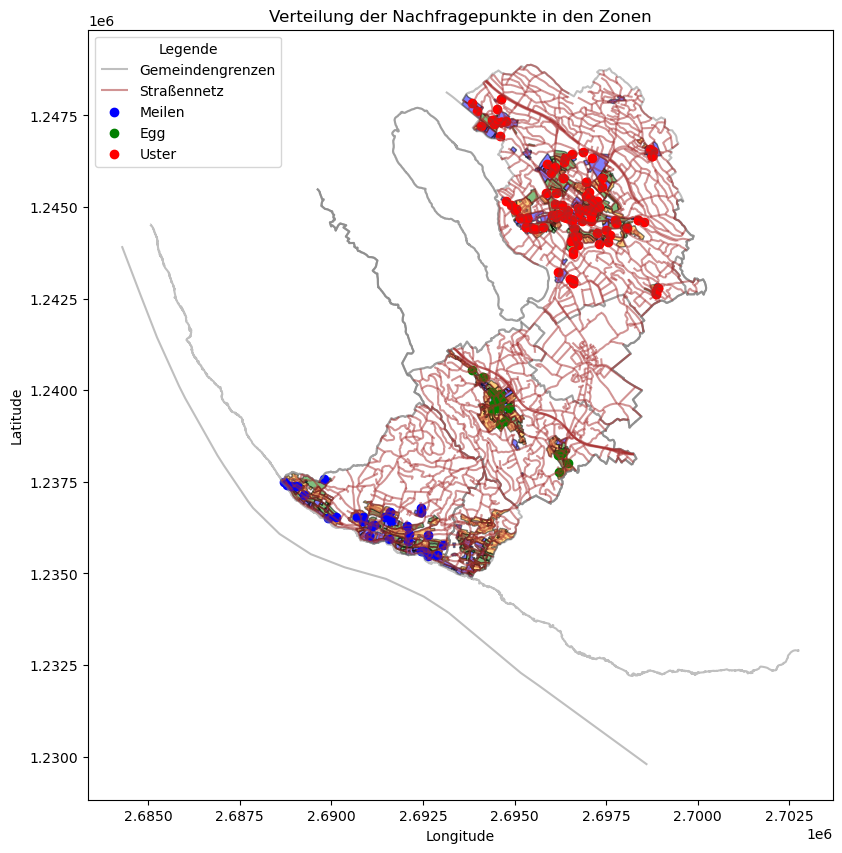

In [25]:
# Annahme: gemeinden_zentral_gdfs, gemeinden_höhere_Dichte_gdfs, gemeinden_niedrige_Dichte_gdfs sind GeoDataFrames mit den Gemeindengrenzen

# Erstellen von Farbzuweisungen für die Gemeinden
farben = {
    'Meilen': 'blue',
    'Egg': 'green',
    'Uster': 'red'
}

# Plotten der Gemeinden und der Gemeindengrenzen
fig, ax = plt.subplots(figsize=(10, 10))
gemeindengrenzen_gdf.plot(ax=ax, color='gray', edgecolor='black', alpha=0.5, label='Gemeindengrenzen')
gemeinden_zentral_gdfs.plot(ax=ax, color='blue', edgecolor='black', alpha=0.5, label='Zentral')
gemeinden_höhere_Dichte_gdfs.plot(ax=ax, color='green', edgecolor='black', alpha=0.5, label='Höhere Dichte')
gemeinden_niedrige_Dichte_gdfs.plot(ax=ax, color='orange', edgecolor='black', alpha=0.5, label='Niedrige Dichte')

# Plotten des Straßennetzes
strassennetz_gdf.plot(ax=ax, color='brown', alpha=0.5, label='Straßennetz')

# Plotten der Nachfragepunkte für Meilen
punkte_meilen_zentral = gemeinden_zentral_gdfs.loc[nachfrage_meilen_zentral, 'geometry'].centroid
punkte_meilen_höhere_Dichte = gemeinden_höhere_Dichte_gdfs.loc[nachfrage_meilen_höhere_Dichte, 'geometry'].centroid
punkte_meilen_niedrige_Dichte = gemeinden_niedrige_Dichte_gdfs.loc[nachfrage_meilen_niedrige_Dichte, 'geometry'].centroid

# Alle Punkte für Meilen zusammenführen
alle_punkte_meilen = pd.concat([punkte_meilen_zentral, punkte_meilen_höhere_Dichte, punkte_meilen_niedrige_Dichte])

# Plotten der Punkte für Meilen
ax.scatter(alle_punkte_meilen.x, alle_punkte_meilen.y, color=farben['Meilen'], label='Meilen')

# Plotten der Nachfragepunkte für Egg
punkte_egg_zentral = gemeinden_zentral_gdfs.loc[nachfrage_egg_zentral, 'geometry'].centroid
punkte_egg_höhere_Dichte = gemeinden_höhere_Dichte_gdfs.loc[nachfrage_egg_höhere_Dichte, 'geometry'].centroid
punkte_egg_niedrige_Dichte = gemeinden_niedrige_Dichte_gdfs.loc[nachfrage_egg_niedrige_Dichte, 'geometry'].centroid

# Alle Punkte für Egg zusammenführen
alle_punkte_egg = pd.concat([punkte_egg_zentral, punkte_egg_höhere_Dichte, punkte_egg_niedrige_Dichte])

# Plotten der Punkte für Egg
ax.scatter(alle_punkte_egg.x, alle_punkte_egg.y, color=farben['Egg'], label='Egg')

# Plotten der Nachfragepunkte für Uster
punkte_uster_zentral = gemeinden_zentral_gdfs.loc[nachfrage_uster_zentral, 'geometry'].centroid
punkte_uster_höhere_Dichte = gemeinden_höhere_Dichte_gdfs.loc[nachfrage_uster_höhere_Dichte, 'geometry'].centroid
punkte_uster_niedrige_Dichte = gemeinden_niedrige_Dichte_gdfs.loc[nachfrage_uster_niedrige_Dichte, 'geometry'].centroid

# Alle Punkte für Uster zusammenführen
alle_punkte_uster = pd.concat([punkte_uster_zentral, punkte_uster_höhere_Dichte, punkte_uster_niedrige_Dichte])

# Plotten der Punkte für Uster
ax.scatter(alle_punkte_uster.x, alle_punkte_uster.y, color=farben['Uster'], label='Uster')


# Anpassen der Plot-Einstellungen
plt.title('Verteilung der Nachfragepunkte in den Zonen')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Legende')
plt.show()
